In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.formatter.useoffset'] = False

#%load_ext rpy2.ipython

In [2]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

In [3]:
import pandas as pd

import os
cwd = os.getcwd()
print(cwd)
#alldata = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/big_dataframe_Xist.txt',sep="\t",header=0,index_col=0)
alldata = pd.read_csv('../../big_dataframe_Xist.txt',sep="\t",header=0,index_col=0)

C:\Users\maran\Desktop\TestGit\Jupyter notebooks\FIGURES_SANDER


In [4]:
alldata.head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
0,1,C,0,0,0.0,0,0,0,0,0,0,9.079400e-11,3.025526e-31,0
1,2,G,0,0,0.0,0,0,0,0,0,0,2.755947e-03,2.754797e-03,0
2,3,G,0,0,0.0,0,0,0,0,0,0,4.410761e-35,2.410406e-65,0
3,4,C,0,0,0.0,0,0,0,0,0,0,2.754800e-03,2.754800e-03,0
4,5,T,0,0,0.0,0,0,0,0,0,0,3.113080e-30,1.367282e-82,0


In [5]:
counter=0
counter2 = 0
for index, row in alldata.iterrows():
    if row['diffBUMHMM_ex_vivo'] > 0.9:
        counter = counter+1
    
    elif row['diffBUMHMM_in_cell'] > 0.9:
        counter2= counter2 +1
        

print(counter)
print(counter2)






1542
173


In [9]:
#oldanalysis = pd.read_csv('../../Xist_in vivo_vs_ex vivo_diff_BUM_HMM_analysed.txt',sep="\t",header=0,index_col=0)
oldanalysis = pd.read_csv('../../Analysis/diffBUM-HMM/Xist_in vivo_vs_ex vivo_new_data_october_diff_BUM_HMM_analysed.txt',sep="\t",header=0,index_col=0)


In [9]:
#oldanalysis = pd.read_csv('../../Xist_in vivo_vs_ex vivo_diff_BUM_HMM_analysed.txt',sep="\t",header=0,index_col=0)
#oldanalysis = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Analysis/diffBUM-HMM/Xist_in vivo_vs_ex vivo_diff_BUM_HMM_analysed.txt',sep="\t",header=0,index_col=0)


In [10]:
oldanalysis.head()

,UU,UM,MU,MM
1,1.000000,5.310265e-14,5.125995e-10,2.722039e-23
2,0.994480,2.754820e-03,2.757526e-03,7.638654e-06
3,1.000000,7.423341e-30,1.852539e-23,1.375203e-52
4,0.981319,9.296475e-03,9.296468e-03,8.806961e-05
5,0.970306,1.473533e-02,1.473532e-02,2.237746e-04


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


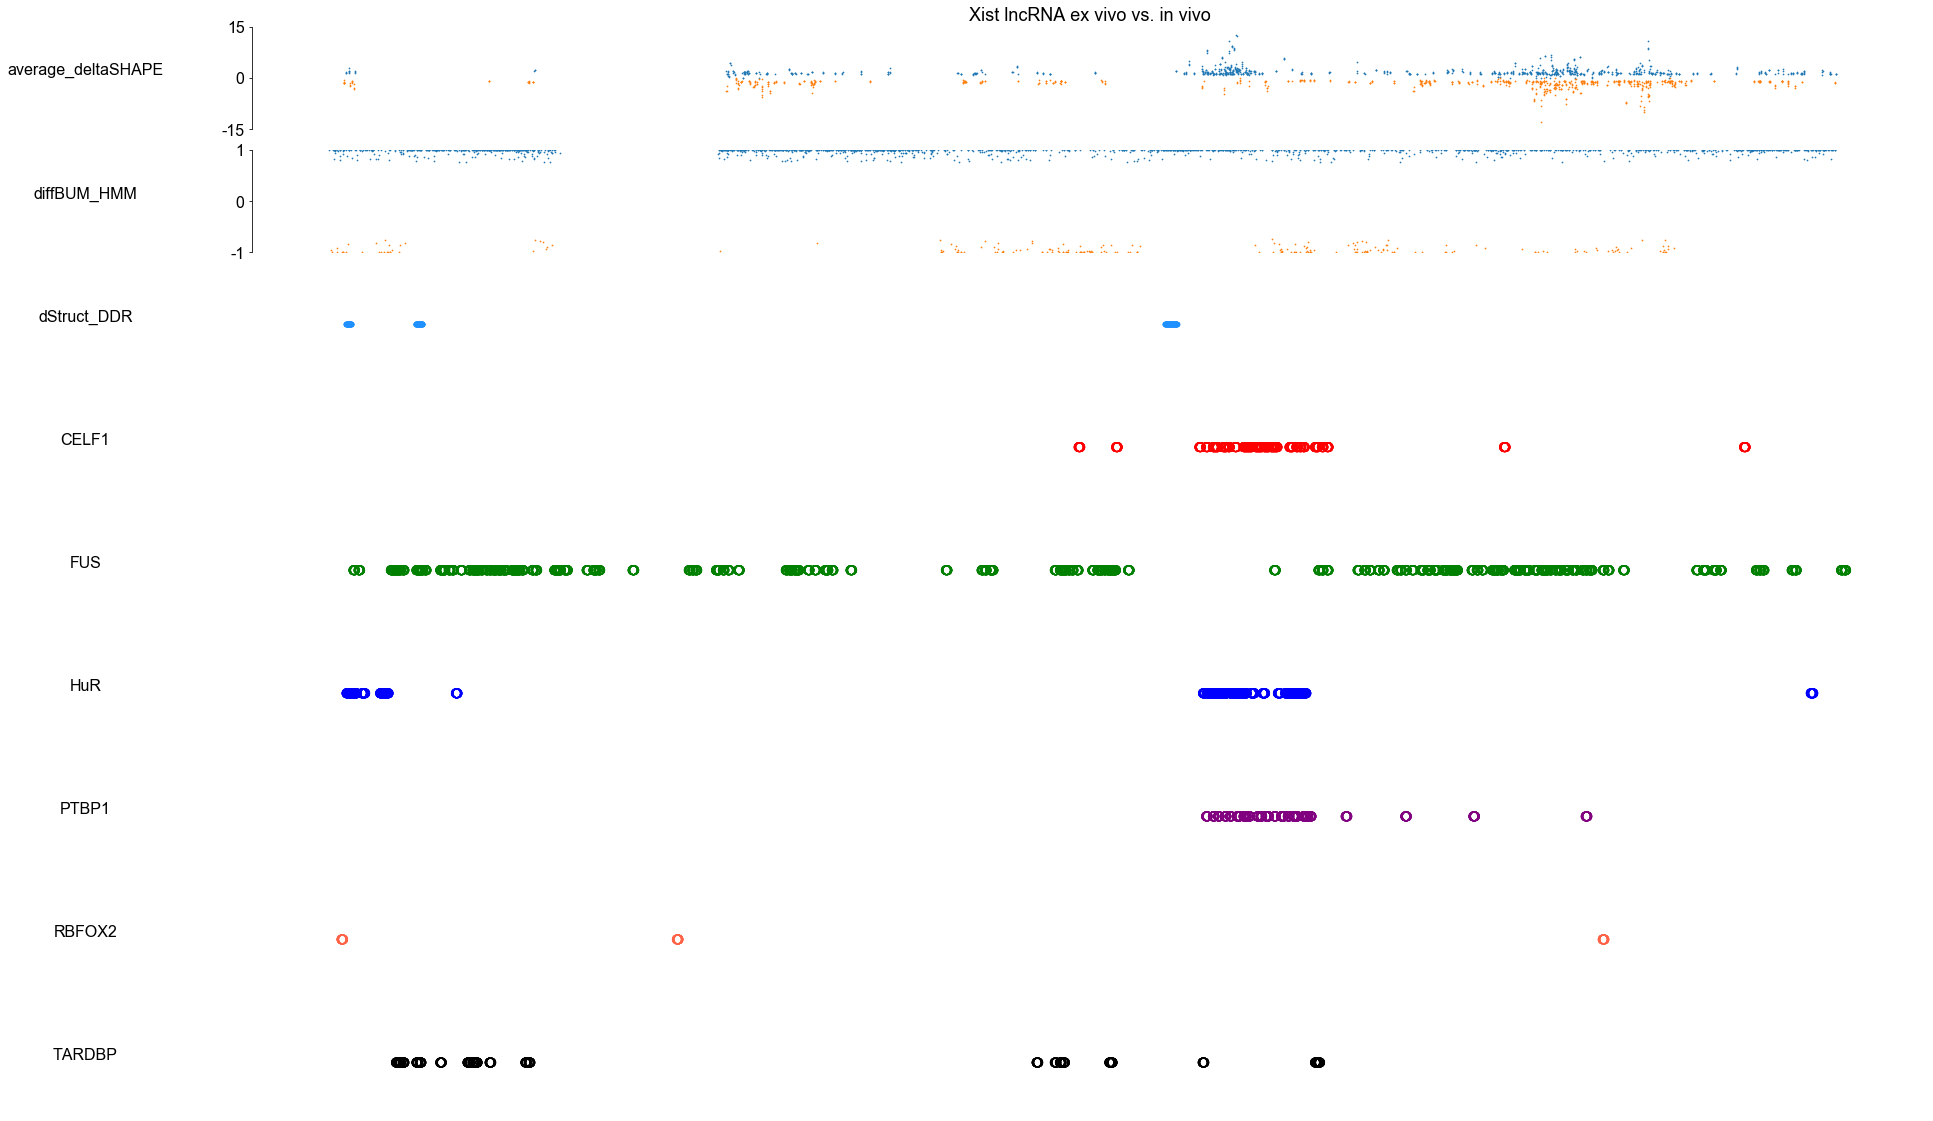

In [7]:
# filtered for posterior probabilities of modification of >=0.95



count = 0
numberofplots = 9

fig,ax = plt.subplots(numberofplots,figsize=[30,20],sharex=True)
plusvalues = alldata[alldata['average_deltaSHAPE'] > 0]
x = plusvalues.index
y = plusvalues['average_deltaSHAPE'].values
exvivo = ax[count].scatter(x,y, s=0.5)
minusvalues = alldata[alldata['average_deltaSHAPE'] < 0]
x = minusvalues.index
y = minusvalues['average_deltaSHAPE'].values
invivo = ax[count].scatter(x,y,s=0.5)
xticks = list(np.arange(1,len(alldata.index),1000))
ymin = -15
ymax = 15
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'average_deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Xist lncRNA ex vivo vs. in vivo',fontsize=18)
#ax[0].legend((MU,UM), ('More reactive in vivo', 'More reactive ex vivo'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

exvivo = alldata['diffBUMHMM_ex_vivo']
invivo = alldata['diffBUMHMM_in_cell']
### Only plotting everything that is higher than 0.05
exvivo[exvivo < 0.75] = np.nan
invivo[invivo < 0.75] = np.nan

x = exvivo.index
y = exvivo.values
plus = ax[count].scatter(x,y, s=0.5)
x = invivo.index
y = -invivo.values
minus = ax[count].scatter(x,y, s=0.5)
ymin = -1
ymax = 1
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

count += 1



#exvivo = oldanalysis['UM']
#invivo = oldanalysis['MU']
#exvivo[exvivo < 0.75] = np.nan
#invivo[invivo < 0.75] = np.nan

#x = exvivo.index
#y = exvivo.values
#plus = ax[count].scatter(x,y)
#x = invivo.index
#y = -invivo.values
#minus = ax[count].scatter(x,y)
#ymin = -1
#ymax = 1
#formatAxes(ax[count],\
#           text_size = 16,\
#           ylabel = 'diffBUM_HMM',\
 #          ylim = [ymin,ymax],\
#           yticklabels = [ymin,0,ymax],\
#           yticks = [ymin,0,ymax],\
 #          xticks = xticks)
#count += 1
    
#NOT PART OF PREVIOUS COMMENT    
#ax[count].set_title('Xist lncRNA ex vivo vs. in vivo',fontsize=18)
#ax[count].legend((plus,minus), ('More reactive ex vivo', 'More reactive in vivo'), loc=[1,1], fontsize = 16)
#ax[count].tick_params(axis='x',which='major',pad=150)



name = 'dStruct_DDR'
selection = alldata[name][alldata[name] > 0]
x = selection.index
y = selection.values
ax[count].scatter(x,y,s=20, facecolors='dodgerblue', edgecolors='dodgerblue')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'CELF1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='r')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'FUS'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='green')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'HuR'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='blue')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'PTBP1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='purple')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'RBFOX2'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='tomato')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'TARDBP'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='black')
formatAxes(ax[count],ylabel=name,text_size=16)

fig.align_ylabels()
fig.savefig("agreement_plot_diffBUM_HMM_Xist_ex_vivo_vs_in_vivo_0.9threshold_correctly_rounded_diffBUMHHMM.pdf", dpi= 300)

### Loading the mutation frequencies:

In [ ]:
in_vivo_rep1 = pd.read_csv("../../Data/XIST_1M7_in-cell_rep1.txt",sep="\t",header=0,index_col=0)
in_vivo_rep2 = pd.read_csv("../../Data/XIST_1M7_in-cell_rep2.txt",sep="\t",header=0,index_col=0)
ex_vivo_rep1 = pd.read_csv("../../Data/XIST_1M7_ex-vivo_rep1.txt",sep="\t",header=0,index_col=0)
ex_vivo_rep2 = pd.read_csv("../../Data/XIST_1M7_ex-vivo_rep2.txt",sep="\t",header=0,index_col=0)

In [ ]:
in_vivo_rep1.head()

In [ ]:
mutationrates = pd.DataFrame(0,index=in_vivo_rep1.index,columns=["in_vivo_rep1_mutrate","in_vivo_rep2_mutrate",\
                                                               "ex_vivo_rep1_mutrate","ex_vivo_rep2_mutrate"])

In [ ]:
mutationrates.head()

In [ ]:
mutationrates['in_vivo_rep1_mutrate'] = in_vivo_rep1['1M7_mutation_rate']
mutationrates['in_vivo_rep2_mutrate'] = in_vivo_rep2['1M7_mutation_rate']
mutationrates['ex_vivo_rep1_mutrate'] = ex_vivo_rep1['1M7_mutation_rate']
mutationrates['ex_vivo_rep2_mutrate'] = ex_vivo_rep2['1M7_mutation_rate']

In [ ]:
mutationrates.head()

In [ ]:
numberofplots = 4
fig,ax = plt.subplots(numberofplots,figsize=[30,20],sharex=True)

count = 0

ymax = 0.05

name = 'in_vivo_rep1_mutrate'
data = mutationrates[name]
x = data.index
y = data.values
ax[count].plot(x,y,color='r')
formatAxes(ax[count],ylabel=name,text_size=16,ylim=[0,ymax],yticks=[0,ymax])

count += 1
name = 'in_vivo_rep2_mutrate'
data = mutationrates[name]
x = data.index
y = data.values
ax[count].plot(x,y,color='r')
formatAxes(ax[count],ylabel=name,text_size=16,ylim=[0,ymax],yticks=[0,ymax])

count += 1
name = 'ex_vivo_rep1_mutrate'
data = mutationrates[name]
x = data.index
y = data.values
ax[count].plot(x,y,color='r')
formatAxes(ax[count],ylabel=name,text_size=16,ylim=[0,ymax],yticks=[0,ymax])

count += 1
name = 'ex_vivo_rep2_mutrate'
data = mutationrates[name]
x = data.index
y = data.values
ax[count].plot(x,y,color='r')
formatAxes(ax[count],ylabel=name,text_size=16,ylim=[0,ymax],yticks=[0,ymax])